# Stock and Crypto Movement Simulation

This notebook aims to simulate the movement of stocks and cryptocurrencies and model their behavior against each other. We will use mathematical models and statistical analysis to understand the dynamics between these two asset classes.

## Objectives
- Simulate stock price movements using stochastic models.
- Simulate cryptocurrency price movements using similar models.
- Compare and contrast the behavior of stocks and cryptocurrencies.
- Use LaTeX for mathematical expressions and explanations.

## Plan
1. **Data Generation**: Generate synthetic data for stock and crypto prices.
2. **Modeling**: Use mathematical models to simulate price movements.
3. **Analysis**: Compare the simulated movements and analyze the results.
4. **Visualization**: Plot the results for better understanding.

Let's start by generating synthetic data for stock and crypto prices.

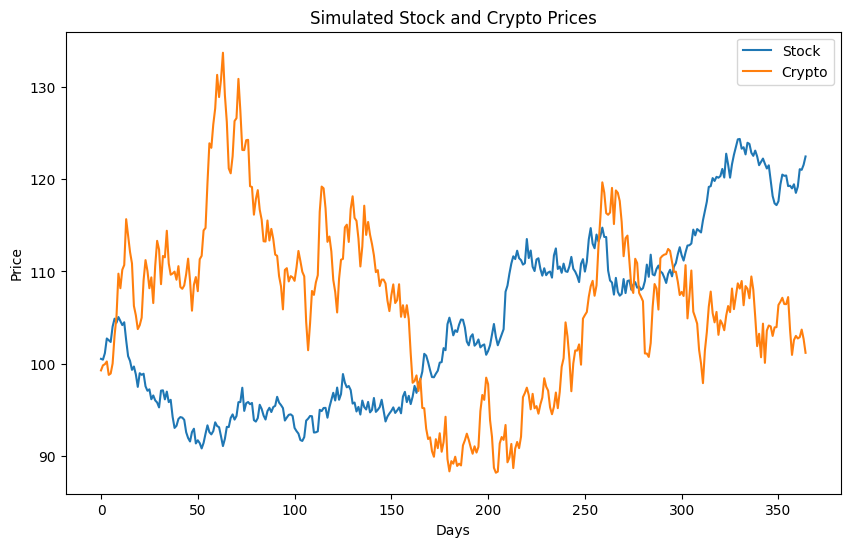

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for stock and crypto simulation
initial_stock_price = 100
initial_crypto_price = 100

# Time parameters
days = 365

# Generate random daily returns
stock_returns = np.random.normal(0.0005, 0.01, days)
crypto_returns = np.random.normal(0.001, 0.02, days)

# Simulate stock and crypto prices
stock_prices = initial_stock_price * np.cumprod(1 + stock_returns)
crypto_prices = initial_crypto_price * np.cumprod(1 + crypto_returns)

# Create a DataFrame for easy plotting
data = pd.DataFrame({'Stock': stock_prices, 'Crypto': crypto_prices})

# Plot the simulated prices
data.plot(title='Simulated Stock and Crypto Prices', figsize=(10, 6))
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

## Mathematical Modeling

To model the behavior of stocks and cryptocurrencies against each other, we can use correlation and regression analysis. These methods will help us understand the relationship between the two asset classes.

### Correlation
The correlation coefficient $r$ measures the strength and direction of a linear relationship between two variables. It is calculated as:

$$ r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \sum{(y_i - \bar{y})^2}}} $$

where $x_i$ and $y_i$ are the individual sample points and $\bar{x}$ and $\bar{y}$ are the means of the $x$ and $y$ samples, respectively.

### Regression
Linear regression can be used to model the relationship between stock and crypto prices. The linear regression equation is:

$$ y = \beta_0 + \beta_1 x + \epsilon $$

where $y$ is the dependent variable (crypto prices), $x$ is the independent variable (stock prices), $\beta_0$ is the intercept, $\beta_1$ is the slope, and $\epsilon$ is the error term.

Let's calculate the correlation and perform a linear regression analysis on the simulated data.

Correlation between stock and crypto prices: -0.33
Linear Regression Results:
Slope: -0.31
Intercept: 138.83
R-squared: 0.11
P-value: 1.93e-10
Standard error: 0.05


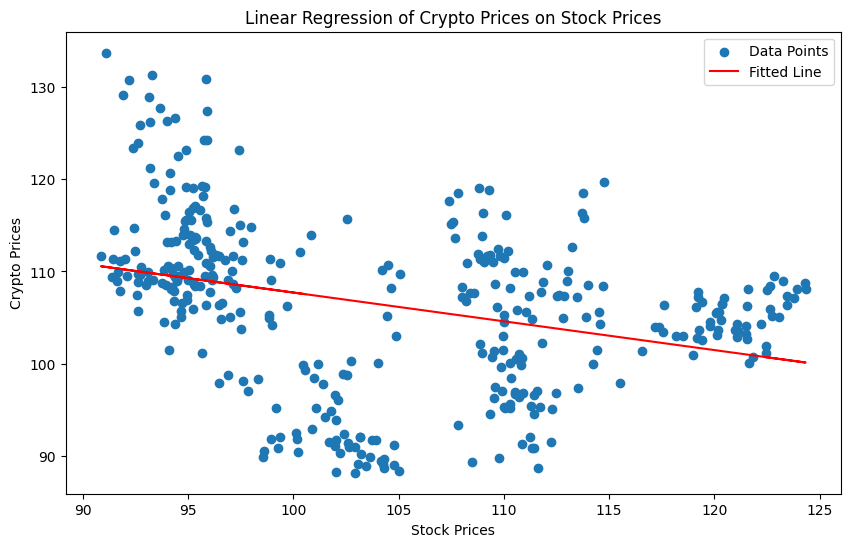

In [2]:
from scipy.stats import linregress

# Calculate correlation
correlation = data['Stock'].corr(data['Crypto'])
print(f"Correlation between stock and crypto prices: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(data['Stock'], data['Crypto'])

print(f"Linear Regression Results:")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2e}")
print(f"Standard error: {std_err:.2f}")

# Plot regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['Stock'], data['Crypto'], label='Data Points')
plt.plot(data['Stock'], intercept + slope * data['Stock'], 'r', label='Fitted Line')
plt.title('Linear Regression of Crypto Prices on Stock Prices')
plt.xlabel('Stock Prices')
plt.ylabel('Crypto Prices')
plt.legend()
plt.show()

## MLP-Style Analysis

To further analyze the relationship between stock and crypto prices, we can use a simple Multi-Layer Perceptron (MLP) model. This neural network model can capture non-linear relationships that linear regression might miss.

### MLP Model
An MLP consists of an input layer, one or more hidden layers, and an output layer. Each layer is composed of neurons that apply a non-linear activation function to the weighted sum of inputs.

For this analysis, we'll use a single hidden layer MLP to predict crypto prices based on stock prices. We'll use the ReLU activation function for the hidden layer and a linear activation for the output layer.

Let's implement the MLP model using TensorFlow/Keras.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Prepare the data
X = data['Stock'].values.reshape(-1, 1)
y = data['Crypto'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the MLP model
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=0)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"MLP Model Loss: {loss:.2f}")

# Predict and plot
y_pred = model.predict(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='True Values')
plt.scatter(X_test, y_pred, label='Predictions', alpha=0.7)
plt.title('MLP Predictions vs True Crypto Prices')
plt.xlabel('Stock Prices')
plt.ylabel('Crypto Prices')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'tensorflow'